# Healthcare Fraud --- II Models 

# Objectives
This notebook will conduct an analysis of the Fraud, Waste, and Abuse of Medical resources. I will focus on detecting any hospital that may abuse the resources compared to its peers of the same features, location, or each diagnosis group.

# Dataset
The dataset is from the Medicare Inpatient Hospitals by Geography and service that provides information on hospital discharges. Please see more information in "Healthcare Fraud --- I EDA&Feature Engineering".

# Models
I will perform various techniques to identify fraud in the healthcare industry and follow modeling procedures for the model development, assessment, and interpretation of the results. 
* Model development
* Threshold determination
* Descriptive statistics of the normal and abnormal groups

Python Outlier Detection (PyOD) module includes many supervised and unsupervised algorithms to detect anomalies. I will apply histogram-based outlier detection (HBOS) in this notebook.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation-" data-toc-modified-id="Data-preparation--1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation <a class="anchor" id="Section_1" rel="nofollow"></a></a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Models---HBOS-in-the-PyOD-module" data-toc-modified-id="Models---HBOS-in-the-PyOD-module-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models - HBOS in the PyOD module</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Model-development" data-toc-modified-id="Model-development-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Model development</a></span></li><li><span><a href="#Threshold-determination" data-toc-modified-id="Threshold-determination-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Threshold determination</a></span></li><li><span><a href="#Descriptive-statistics-of-the-normal-and-abnormal-groups" data-toc-modified-id="Descriptive-statistics-of-the-normal-and-abnormal-groups-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Descriptive statistics of the normal and abnormal groups</a></span></li></ul></li><li><span><a href="#Modeling---Tuning-Hyperparameters-with-aggregation" data-toc-modified-id="Modeling---Tuning-Hyperparameters-with-aggregation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Modeling - Tuning Hyperparameters with aggregation</a></span><ul class="toc-item"><li><span><a href="#Average" data-toc-modified-id="Average-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Average</a></span></li><li><span><a href="#Average-of-Maximum-(AOM)" data-toc-modified-id="Average-of-Maximum-(AOM)-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Average of Maximum (AOM)</a></span></li><li><span><a href="#Maximum-of-Average-(MOA)" data-toc-modified-id="Maximum-of-Average-(MOA)-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Maximum of Average (MOA)</a></span></li><li><span><a href="#Maximum-of-Maximum-(MOM)" data-toc-modified-id="Maximum-of-Maximum-(MOM)-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Maximum of Maximum (MOM)</a></span></li></ul></li></ul></li></ul></div>

In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

#pd.options.display.float_forma
t = '{:.2f}'.format

## Data preparation <a class="anchor" id="Section_1"></a>
Dataset is prepared from last module. 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from pyod.models.hbos import HBOS

In [8]:
#Loading Data
path = '/Users/Edwina/Desktop/2022fall/5420/week5'
df = pd.read_csv(path + '/data_healthcare.csv')

In [9]:
#df.describe()
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 42 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        163065 non-null  int64  
 1   DRG                               163065 non-null  object 
 2   Provider_Id                       163065 non-null  int64  
 3   Provider_Name                     163065 non-null  object 
 4   Provider_StreetAddress            163065 non-null  object 
 5   Provider_City                     163065 non-null  object 
 6   Provider_State                    163065 non-null  object 
 7   Provider_Zipcode                  163065 non-null  int64  
 8   Hospital_referral_region_desp     163065 non-null  object 
 9   Total_Discharges                  163065 non-null  int64  
 10  Average_Total_Payments            163065 non-null  float64
 11  Average_Medicare_Payment          163065 non-null  f

In [10]:
df.head(3)

,Unnamed: 0,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,...,ratio_MP_DRG_bin,AvgMedicarePayment_By_State_DRG,ratio_MP_State_DRG,ratio_MP_State_DRG_bin,AvgMedicarePayment_By_Region_DRG,ratio_MP_Region_DRG,ratio_MP_Region_DRG_bin,MTotalPayment_By_City,ratio_MTP_City_DRG,ratio_MTP_City_DRG_bin
0,0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,...,"(0.802, 0.917]",4585.965000,1.038763,"(0.977, 1.093]",4585.965000,1.038763,"(0.977, 1.093]",8316.949825,0.694634,"(0.534, 0.774]"
1,1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,...,"(0.802, 0.917]",4604.024615,1.080948,"(0.977, 1.093]",4604.024615,1.080948,"(0.977, 1.093]",6812.131224,0.849598,"(0.774, 1.305]"
2,2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,...,"(0.723, 0.802]",4604.024615,0.967369,"(0.873, 0.977]",4604.024615,0.967369,"(0.873, 0.977]",8881.752832,0.611923,"(0.534, 0.774]"


## Feature Selection

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
#newdf.drop('Provider_Zipcode')
newdf = newdf.drop('Provider_Zipcode', axis=1)
newdf.shape

(163065, 25)

In [14]:
#X_train = newdf.copy()
features=['Total_Discharges',
       'Average_Total_Payments', 'Average_Medicare_Payment','ratio_TP_DRG',
       'ratio_TP_State_DRG',
       'ratio_TP_Region_DRG',
       'ratio_D_DRG', 
       'ratio_D_States_DRG', 
       'ratio_D_Region_DRG',  'ratio_MP_DRG',
        'ratio_MP_State_DRG',
        'ratio_MP_Region_DRG',
        'ratio_MTP_City_DRG']
X_train = df[features]
#X_train = X_train[features]
X_train.head()

,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,ratio_TP_DRG,ratio_TP_State_DRG,ratio_TP_Region_DRG,ratio_D_DRG,ratio_D_States_DRG,ratio_D_Region_DRG,ratio_MP_DRG,ratio_MP_State_DRG,ratio_MP_Region_DRG,ratio_MTP_City_DRG
0,91,5777.24,4763.73,0.830000,1.005855,1.037810,2.921770,1.338235,1.338235,0.857428,1.038763,1.038763,0.694634
1,14,5787.57,4976.71,0.831484,1.007653,1.008540,0.449503,0.509804,0.509804,0.895762,1.080948,1.080948,0.849598
2,24,5434.95,4453.79,0.780824,0.946260,0.947092,0.770577,0.873950,0.873950,0.801642,0.967369,0.967369,0.611923
3,25,5417.56,4129.16,0.778325,0.943232,0.944062,0.802684,0.910364,0.910364,0.743211,0.896859,0.896859,0.593905
4,18,5658.33,4851.44,0.812916,0.985152,0.986018,0.577933,0.655462,0.655462,0.873215,1.053739,1.053739,0.726413


<AxesSubplot:>

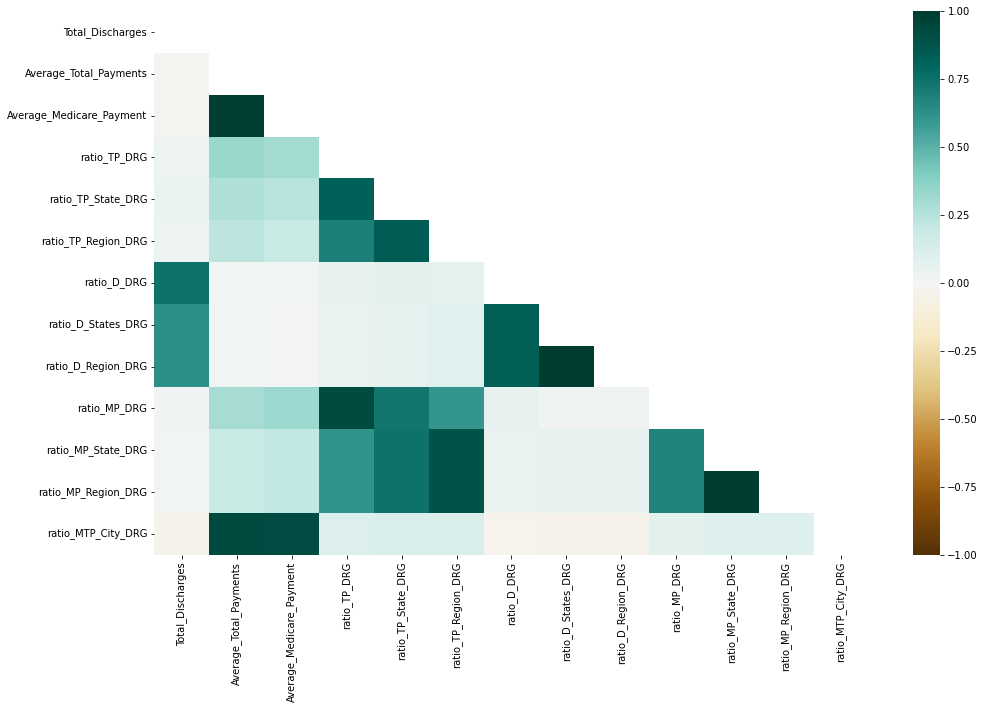

In [15]:
correlation = X_train.corr()
f, ax = plt.subplots(figsize=(16, 10))
mask = np.triu(np.ones_like(correlation, dtype=bool)) #mask for upper triangle
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, mask = mask,vmin=-1, vmax=1,
            cmap = 'BrBG',
            #annot=True
           )

## Models - HBOS in the PyOD module

### Overview
There are 3 types of unsupervised anomaly detection approaches, including proximity-based, distribution-based, or ensemble-based methods. Distribution-based algorithms identify objects in low probability regions as anomalous. The most important advantage of this method is shorter computation time compared to the proximity-based or ensemble-based methods. 

One example using distribution-based algorithms is histogram-based outlier detection (HBOS). It scores models univariate feature densities using histograms. In other words, it calculates an outlier score by creating a univariate histogram for every single feature of the dataset and assumes that features are independent. The total amount of all scores measure its outlier-ness.

I have experimented with a range of values for the hyperparameters: 
* Model 1: {𝑛_𝑏𝑖𝑛𝑠: 50}
* Model 2: {𝑛_𝑏𝑖𝑛𝑠: 10 bins (5, 10, 15, 20, 25, 30, 50, 60, 75, 100)} with 4 aggregation methods. 


### Modeling

#### Model development
The first model will use 50 n_bins and the default comtanimation rate to construct model.

In [122]:
n_bins = 50 
hbos = HBOS(n_bins=n_bins) #using the default comtanimation rate
hbos.fit(X_train)

# Training data
y_train_scores = hbos.decision_function(X_train)
y_train_pred = hbos.predict(X_train)

# Threshold for the defined comtanimation rate
print("The threshold for the default comtanimation rate:" , hbos.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))

The threshold for the default comtanimation rate: 17.088170434351536
The training data: {0: 146758, 1: 16307}


After declaring and fitting the model, I generated the outlier scores for the training data. It also shows the threshold at the assigned contamination rate. Any outlier score higher than the threshold is considered an outlier.

#### Threshold determination

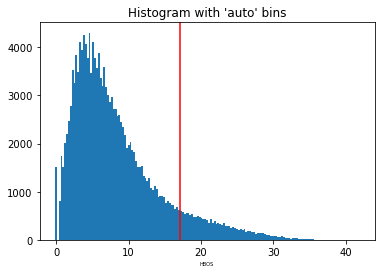

In [124]:
#Determine a reasonable threshold
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('HBOS')
plt.axvline(x = 17.08, color = 'r', label = 'thredhold')
plt.show()

The above chart displays the histogram of the score. We can see that it has a long tail on the right side. Scores above 7.27 are far from the central part of the distribution.

#### Descriptive statistics of the normal and abnormal groups

In [125]:
threshold = hbos.threshold_ # Or other value from the above histogram

# Let's see how many '0's and '1's.
X_train = pd.DataFrame(X_train)
X_train['Anomaly_Score'] = y_train_scores
X_train['Group'] = np.where(X_train['Anomaly_Score']< threshold, 'Normal', 'Outlier')

# Now let's show the summary statistics:
cnt = X_train.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
stat = X_train.groupby('Group').mean().round(2).reset_index() # The avg.
stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
stat


,Group,Count,Count %,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,ratio_TP_DRG,ratio_TP_State_DRG,ratio_TP_Region_DRG,ratio_D_DRG,ratio_D_States_DRG,ratio_D_Region_DRG,ratio_MP_DRG,ratio_MP_State_DRG,ratio_MP_Region_DRG,ratio_MTP_City_DRG,Anomaly_Score
0,Normal,146758,89.999693,41.13,9081.81,7903.01,0.95,0.96,0.97,0.96,0.97,0.97,0.94,0.96,0.96,0.97,6.78
1,Outlier,16307,10.000307,57.55,15338.25,13817.68,1.45,1.36,1.29,1.33,1.26,1.26,1.50,1.32,1.32,1.27,22.28


The above table shows descriptive statistics of the features between the normal and abnormal groups. It is helpful to communicate the soundness of the model. The table shows the count and count percentage of the normal and outlier groups. 
* The size of the outlier group: The outlier group is about 10% at the threshold for the defined comtanimation rate. 
* The average anomaly score: The average HBOS score of the outlier group is far higher than that of the normal group (22.28 > 6.78). This evidence just verifies the data in the outlier group are outliers. 
* The feature statistics in each group: The table shows the outlier group has larger values for each featres than those of the normal group. Therefore the feature statistics proves effectiveness of the model because the suspect observations who commit abuse or fraud will have higher amount than normal groups. 

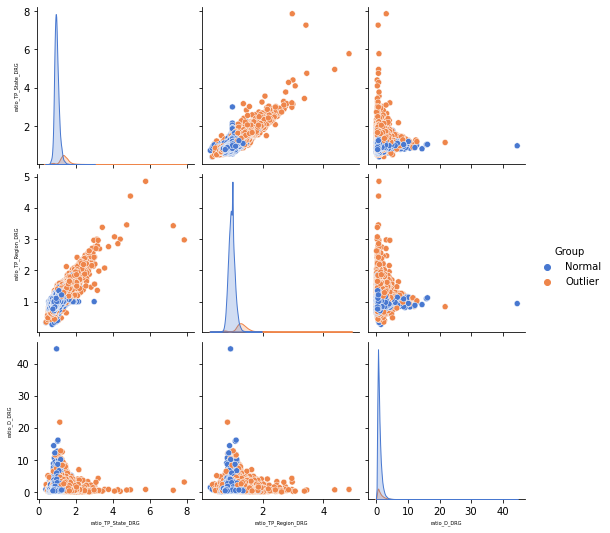

In [180]:
# plot the relationshiop between two festures under two groups
sns.pairplot(X_train.iloc[:,[1,2,3,11]], hue = 'Group', palette='muted') # only show 3 festures for limited computional resources

The chart displays four dimensions of data: taverage total payment, Anomaly Score, the size of Anomaly Score, and the color of groups. We can see that two groups seperate by anomaly Score at 7.27. The outlier group clearly has some large amount of payment. 

Summary

The business insight:
From the summary statistics, Average_Total_Payments, Average_Medicare_Payment, ratio_TP_DRG, and ratio_MP_State_DRG in the outliers is 69%, 75%, 53%, and 60% higher than those in the normals. Surprisingly, Total_Discharges is 89% lower for outliers. This may indicate that hospitals may be likely to charge a high amount with small number of times, which is assocated to unbundling codes. It is possible that they want to gain a large fiancial rewards. Once they seccessfully get, they could receive a considerable amount of income. Medicare Payment also is related to outlier group because a clear difference between two groups. It is possible that hospitals may commit abuse or fraud from the third parties. 

### Modeling - Tuning Hyperparameters with aggregation
The second model will improve Model Stability by Aggregating Multiple Models. Since HBOS is highly related to the bin width. Therefore, I will build 10 HBOS models with different range of bins (histogram widths) to obtain multiple scores then aggregate the scores. The aggregation can use Average, Maximum of Maximum (MOM), Average of Maximum (AOM), and Maximum of Average (MOA). This strategy could help to prevent the overfitting issue and improve model's accuracy. 

#### Average

In [126]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.models.hbos import HBOS

In [127]:
X_train = X_train.iloc[:,0:13] # select X_train columns
#X_train.dtypes

Model development

In [135]:
# Standardize data
X_train_norm = standardizer(X_train)

# Test a range of binning
k_list = [5, 10, 15, 20, 25, 30, 50, 60, 75, 100]
n_clf = len(k_list)
# Just prepare data frames so we can store the model results
train_scores = np.zeros([X_train.shape[0], n_clf])
#test_scores = np.zeros([X_test.shape[0], n_clf])

# Modeling
for i in range(n_clf):
    k = k_list[i]
    hbos = HBOS(n_bins=k)
    hbos.fit(X_train_norm)
    # Store the results in each column:
    train_scores[:, i] = hbos.decision_function(X_train_norm)
    #test_scores[:, i] = hbos.decision_function(X_test_norm)
    print("The threshold with",k,"bins for the default comtanimation rate:" , hbos.threshold_)
# Decision scores have to be normalized before combination
train_scores_norm = standardizer(train_scores)

The threshold with 5 bins for the default comtanimation rate: 27.617963525849202
The threshold with 10 bins for the default comtanimation rate: 24.56940981184607
The threshold with 15 bins for the default comtanimation rate: 23.453890633166687
The threshold with 20 bins for the default comtanimation rate: 22.682427941024876
The threshold with 25 bins for the default comtanimation rate: 22.534445929480356
The threshold with 30 bins for the default comtanimation rate: 22.471293225060105
The threshold with 50 bins for the default comtanimation rate: 21.96834777687233
The threshold with 60 bins for the default comtanimation rate: 21.900426437300666
The threshold with 75 bins for the default comtanimation rate: 21.84692151471733
The threshold with 100 bins for the default comtanimation rate: 21.784785765332067


Threshold determination

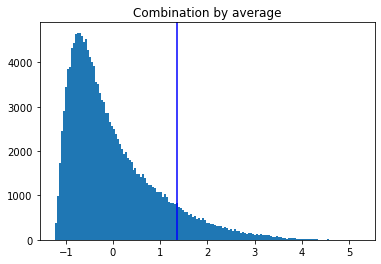

In [149]:
# Combination by average
# The test_scores_norm is 500 x 10. The "average" function will take the average of the 10 columns. The result "y_by_average" is a single column: 
y_train_by_average = average(train_scores_norm)
#y_test_by_average = average(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(y_train_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.axvline(x = 1.35, color = 'b', label = 'thredhold')
plt.show()

The above chart displays the histogram of the score. We can see that it has a long tail on the right side. The histogram suggests a threshold of 1.41. Scores above 1.41 are far from the central part of the distribution.

Descriptive statistics of the normal and abnormal groups

In [150]:
def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_by_average, 1.35)

,Group,Count,Count %,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,ratio_TP_DRG,ratio_TP_State_DRG,ratio_TP_Region_DRG,ratio_D_DRG,ratio_D_States_DRG,ratio_D_Region_DRG,ratio_MP_DRG,ratio_MP_State_DRG,ratio_MP_Region_DRG,ratio_MTP_City_DRG,Anomaly_Score
0,Normal,146759,90.000307,39.95,8577.56,7426.78,0.95,0.96,0.97,0.95,0.96,0.96,0.95,0.97,0.97,0.92,-0.23
1,Outlier,16306,9.999693,68.23,19877.08,18104.21,1.41,1.33,1.27,1.48,1.37,1.37,1.46,1.29,1.29,1.69,2.10


The descriptive statistics with this threshold are shown in the above table. It is helpful to communicate the soundness of the model. It identifies 16386 data points to be the outliers. Although the size of the two groups in the two models is similar, the descriptive statistics have large differences. 
* The size of the outlier group: The outlier group is about 10% at the threshold for the defined comtanimation rate. 
* The average anomaly score: The average HBOS score of the outlier group is far higher than that of the normal group (2.11 > -0.24). This evidence just verifies the data in the outlier group are outliers. Since the second model uses standardized data, the ratio of difference would be helpful to interpret. 
* The feature statistics in each group: The table shows the outlier group has larger values for each feature than those of the normal group. Average_Total_Payments and Average_Medicare_Payment in the outliers are 40% and 69% higher than those in the normals. Therefore the feature statistics prove the effectiveness of the model because the suspect observations who commit abuse or fraud will have a higher amount than normal groups. 

Summary

The business insight:
Compared to the first group, although there are similar patterns, the result of summary statistics in the second one has obvious gaps. The second model could better separate the outliers from normal and has a higher prediction accuracy because of its less overfitting. 
From the summary statistics, Total_Discharges, Average_Total_Payments, Average_Medicare_Payment, ratio_D_DRG, ratio_MP_DRG, and ratio_MTP_City_DRG in the outliers is 88%, 124%, 135%, 66%, 52%, and 76% higher than those in the normals. Surprisingly, Total_Discharges in the second model is positive 89% higher for outliers. This may indicate that hospitals may be likely to charge a high amount (Average_Total_Payments and Average_Medicare_Payment) with a large number of discharges, which is associated with upcoding or unbundling codes. Lastly, the large difference in cities among different clinical diagnoses shows hospitals in different city bill each diagnosis. Any amount above the average reimbursement should be considered as outliers and needs to be further investigated. 

#### Average of Maximum (AOM)

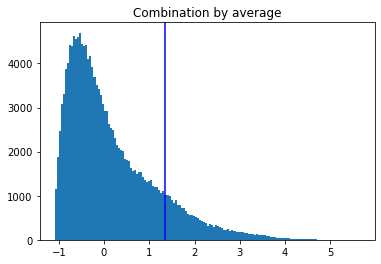

In [154]:
# Combination by aom
# The test_scores_norm is 500 x 10. The "aom" function will take the average of the 10 columns. The result "y_by_average" is a single column: 
y_train_by_aom = aom(train_scores_norm)
#y_test_by_average = aom(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(y_train_by_aom, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.axvline(x = 1.35, color = 'b', label = 'thredhold')
plt.show()

In [159]:
descriptive_stat_threshold(X_train,y_train_by_aom, 1.5)

,Group,Count,Count %,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,ratio_TP_DRG,ratio_TP_State_DRG,ratio_TP_Region_DRG,ratio_D_DRG,ratio_D_States_DRG,ratio_D_Region_DRG,ratio_MP_DRG,ratio_MP_State_DRG,ratio_MP_Region_DRG,ratio_MTP_City_DRG,Anomaly_Score
0,Normal,145732,89.370496,39.69,8473.12,7327.90,0.95,0.96,0.97,0.94,0.96,0.96,0.95,0.97,0.97,0.91,-0.09
1,Outlier,17333,10.629504,68.74,20085.66,18302.91,1.39,1.31,1.24,1.49,1.38,1.38,1.43,1.26,1.26,1.72,2.26


#### Maximum of Average (MOA)

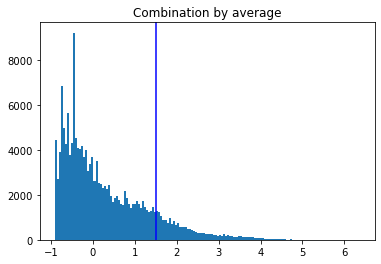

In [160]:
# Combination by average
# The test_scores_norm is 500 x 10. The "moa" function will take the average of the 10 columns. The result "y_by_average" is a single column: 
y_train_by_moa = moa(train_scores_norm)
#y_test_by_average = aom(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(y_train_by_moa, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.axvline(x = 1.5, color = 'b', label = 'thredhold')
plt.show()

In [163]:
descriptive_stat_threshold(X_train,y_train_by_moa, 1.7)

,Group,Count,Count %,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,ratio_TP_DRG,ratio_TP_State_DRG,ratio_TP_Region_DRG,ratio_D_DRG,ratio_D_States_DRG,ratio_D_Region_DRG,ratio_MP_DRG,ratio_MP_State_DRG,ratio_MP_Region_DRG,ratio_MTP_City_DRG,Anomaly_Score
0,Normal,146588,89.89544,40.02,8422.29,7277.25,0.96,0.97,0.97,0.95,0.96,0.96,0.95,0.97,0.97,0.91,0.04
1,Outlier,16477,10.10456,67.32,21141.15,19323.67,1.39,1.31,1.24,1.47,1.37,1.37,1.43,1.26,1.26,1.81,2.49


#### Maximum of Maximum (MOM) 

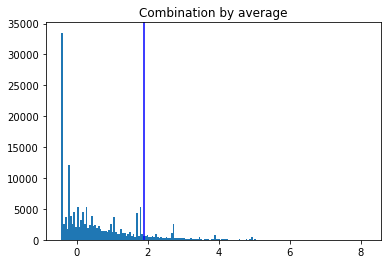

In [168]:
# Combination by average
# The test_scores_norm is 500 x 10. The "moa" function will take the average of the 10 columns. The result "y_by_average" is a single column: 
y_train_by_maximization = maximization(train_scores_norm)
#y_test_by_average = aom(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(y_train_by_maximization, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.axvline(x = 1.9, color = 'b', label = 'thredhold')
plt.show()

In [167]:
descriptive_stat_threshold(X_train,y_train_by_maximization, 1.9)

,Group,Count,Count %,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,ratio_TP_DRG,ratio_TP_State_DRG,ratio_TP_Region_DRG,ratio_D_DRG,ratio_D_States_DRG,ratio_D_Region_DRG,ratio_MP_DRG,ratio_MP_State_DRG,ratio_MP_Region_DRG,ratio_MTP_City_DRG,Anomaly_Score
0,Normal,146094,89.592494,40.30,8262.61,7119.81,0.96,0.97,0.97,0.95,0.96,0.96,0.95,0.97,0.97,0.89,0.28
1,Outlier,16971,10.407506,64.12,22145.49,20328.34,1.37,1.28,1.22,1.42,1.33,1.33,1.41,1.24,1.24,1.94,2.87


Since scores used standardization data, the difference in Anomaly Score is smaller than the raw data. The maximum of Maximum (MOM) and Maximum of Average (MOA)'s distributions of the Anomaly Score are different from the rest two. If keeping 10% as the cutoff, the difference in Anomaly Score is about 2.4 with MOM and MOA, and about 2.3 with the average and AOM. 